In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [6]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

df['Release_Year']=df['Release_Date'].dt.year
df['Release_Month']=df['Release_Date'].dt.month
df['Release_day']=df['Release_Date'].dt.day

# Dropping Overview, Original_Language and Poster-Url

In [7]:
drop_col=['Overview','Original_Language','Poster_Url']
df.drop(drop_col,axis=1,inplace=True)

In [8]:
def categorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],           
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df

In [9]:
labels=['not_popular','below_avg','average','popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique

<bound method Series.unique of 0           popular
1           popular
2         below_avg
3           popular
4           average
           ...     
9822        popular
9823    not_popular
9824    not_popular
9825        average
9826        popular
Name: Vote_Average, Length: 9827, dtype: category
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']>

In [10]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [11]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)

df.head()

In [12]:
df.nunique()

Release_Date     5893
Title            9513
Popularity       8160
Vote_Count       3266
Vote_Average        4
Genre              19
Release_Year      102
Release_Month      12
Release_day        31
dtype: int64

In [13]:
sns.set_style('whitegrid')

# What is the most frequent gnere of the movie released on net

In [14]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

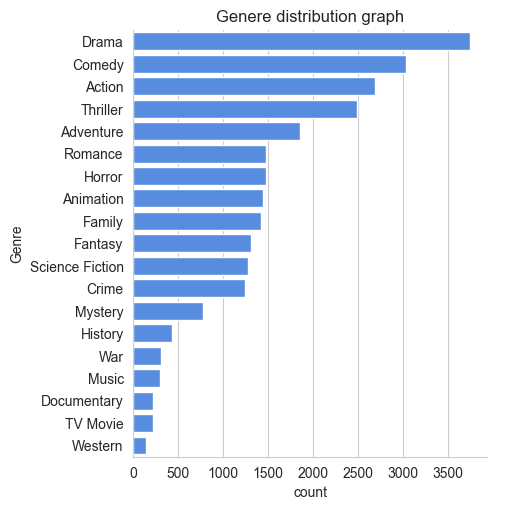

In [15]:
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='#4287f5')
plt.title('Genere distribution graph')
plt.show()

# Which has the highest vote in vote column

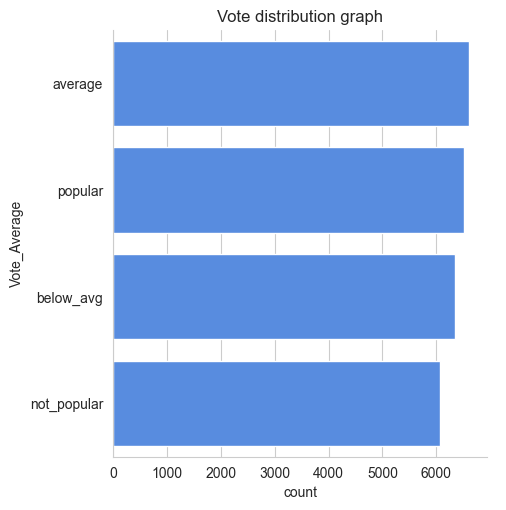

In [16]:
sns.catplot(y='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='#4287f5')
plt.title('Vote distribution graph')
plt.show()

# What Movie Got higher popularity and what is it genere?

In [17]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year,Release_Month,Release_day
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021,12,15
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021,12,15
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021,12,15


In [18]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year,Release_Month,Release_day
25787,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music,2021,3,31
25788,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama,2021,3,31
25789,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History,2021,3,31
25790,1984-09-23,Threads,13.354,186,popular,War,1984,9,23
25791,1984-09-23,Threads,13.354,186,popular,Drama,1984,9,23
25792,1984-09-23,Threads,13.354,186,popular,Science Fiction,1984,9,23


# which year has the most filmed movie

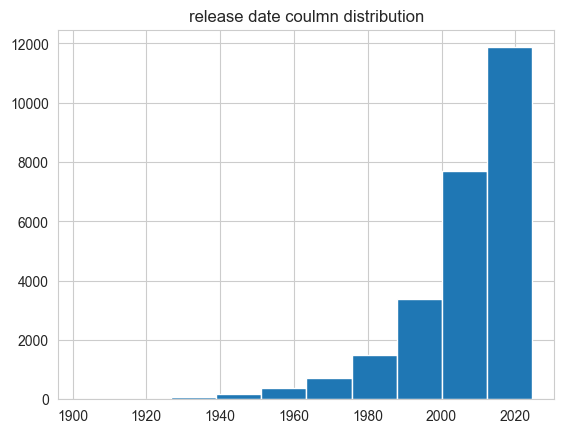

In [19]:
df['Release_Date'].hist()
plt.title('release date coulmn distribution')
plt.show()